# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 629


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | tessalit
Processing Record 3 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | kolosovka
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | jucurutu
Processing Record 9 of Set 1 | robertson
Processing Record 10 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 11 of Set 1 | byron bay
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | airai
Processing Record 16 of Set 1 | rio gallegos
Processing Record 17 of Set 1 | sao felix do xingu
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | biltine
Processing Reco

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.2000,-175.2000,77.16,88,20,8.05,TO,1681384876
1,tessalit,20.1986,1.0114,93.54,7,48,10.20,ML,1681384877
2,rikitea,-23.1203,-134.9692,77.92,72,100,15.50,PF,1681384877
3,punta arenas,-53.1500,-70.9167,30.31,93,75,6.91,CL,1681384877
4,kolosovka,56.4678,73.6110,49.30,62,98,13.35,RU,1681384878


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vaini,-21.2000,-175.2000,77.16,88,20,8.05,TO,1681384876
1,tessalit,20.1986,1.0114,93.54,7,48,10.20,ML,1681384877
2,rikitea,-23.1203,-134.9692,77.92,72,100,15.50,PF,1681384877
3,punta arenas,-53.1500,-70.9167,30.31,93,75,6.91,CL,1681384877
4,kolosovka,56.4678,73.6110,49.30,62,98,13.35,RU,1681384878


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

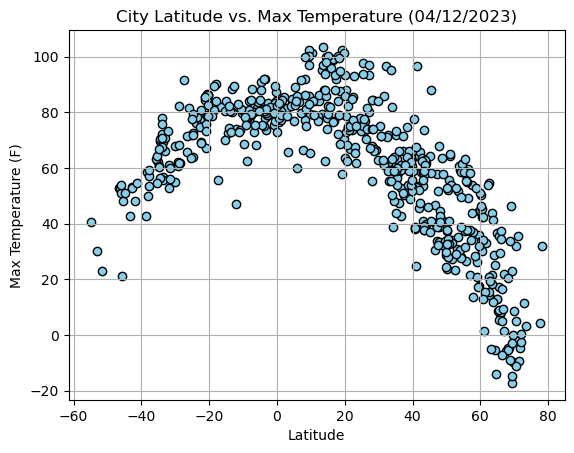

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (04/12/2023)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

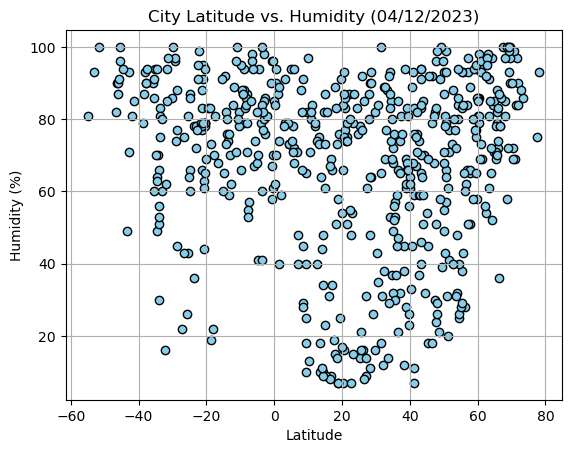

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (04/12/2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

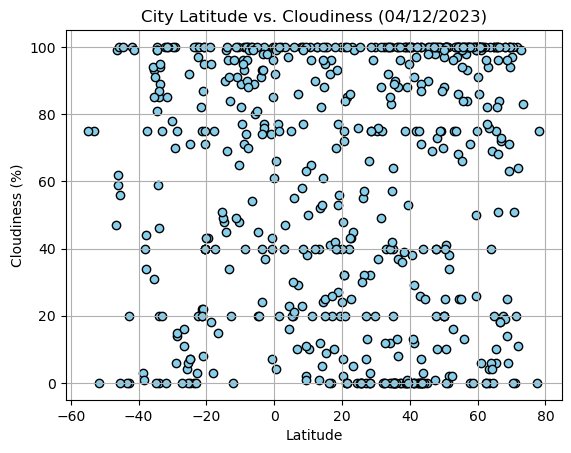

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (04/12/2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

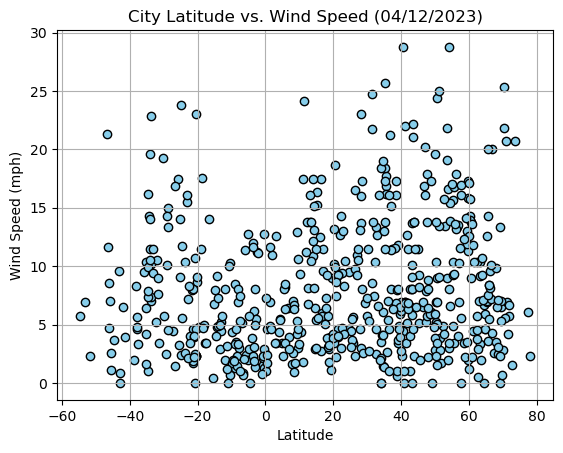

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (04/12/2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
#plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temp", (10, -40))

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tessalit,20.1986,1.0114,93.54,7,48,10.20,ML,1681384877
4,kolosovka,56.4678,73.6110,49.30,62,98,13.35,RU,1681384878
5,bethel,41.3712,-73.4140,64.33,59,0,3.44,US,1681384351
7,robertson,36.5167,-86.8667,52.90,66,100,4.61,US,1681384878
10,kapaa,22.0752,-159.3190,73.72,87,40,12.66,US,1681384880


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vaini,-21.2000,-175.2000,77.16,88,20,8.05,TO,1681384876
2,rikitea,-23.1203,-134.9692,77.92,72,100,15.50,PF,1681384877
3,punta arenas,-53.1500,-70.9167,30.31,93,75,6.91,CL,1681384877
6,jucurutu,-6.0339,-37.0203,81.68,67,89,11.41,BR,1681384878
8,byron bay,-28.6500,153.6167,61.72,77,14,13.33,AU,1681384807


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7270822567549184


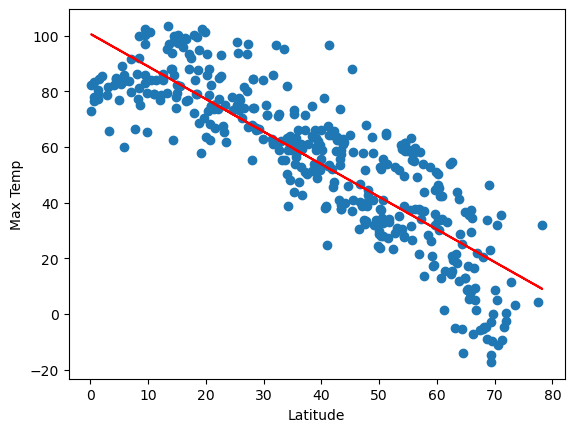

In [19]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temp", (10, -40))

The r-squared is: 0.5701986670994047


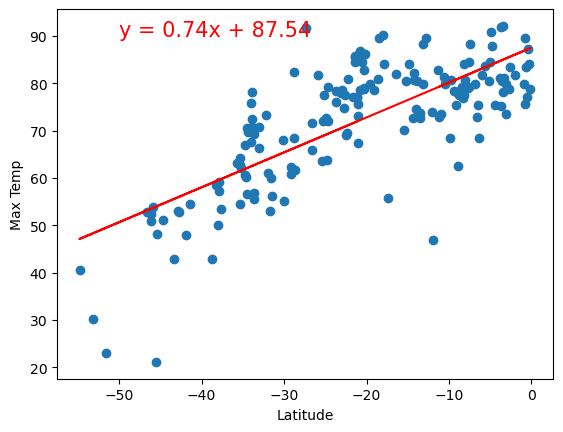

In [20]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temp", (-50, 90))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.07435763256439332


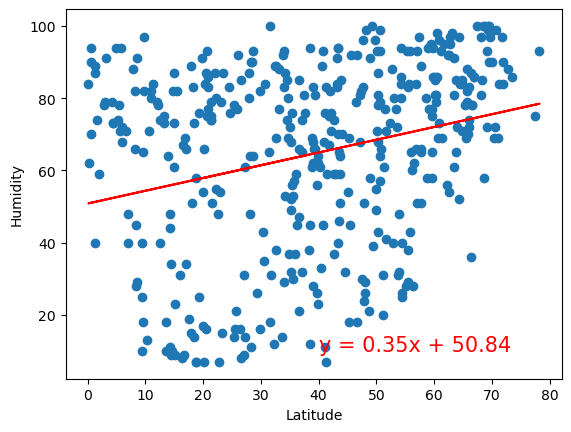

In [21]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity", (40, 10))

The r-squared is: 0.000645587481842897


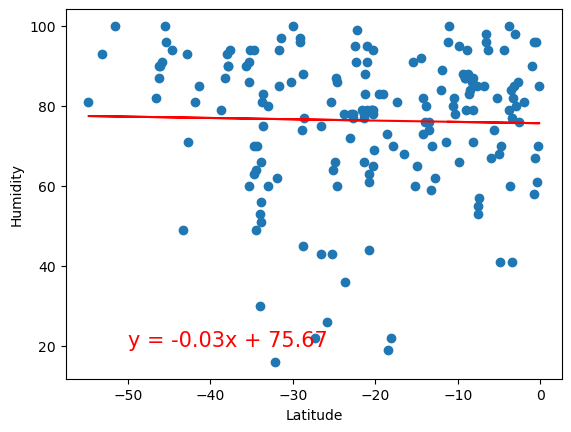

In [22]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity", (-50, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.021112327548169062


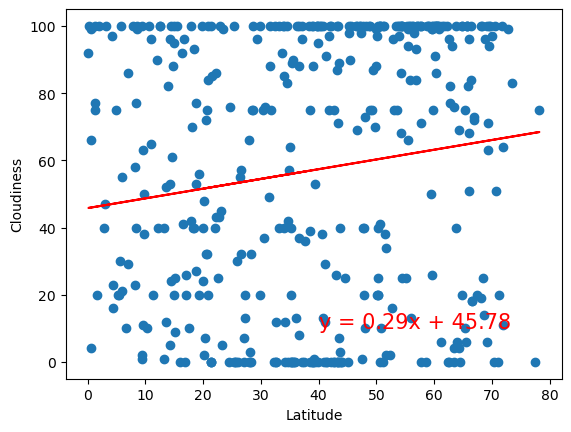

In [23]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness", (40, 10))

The r-squared is: 0.03977108754335039


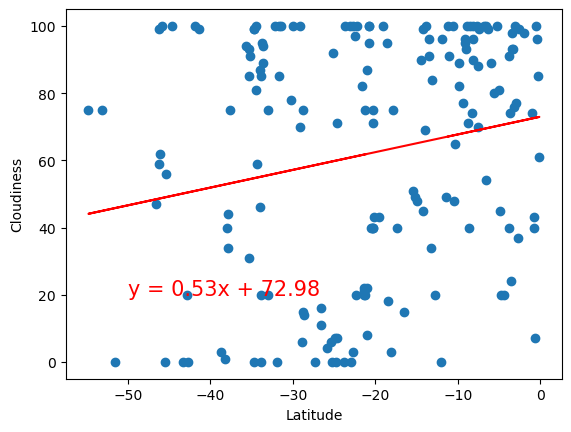

In [24]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness", (-50, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.00795147621988019


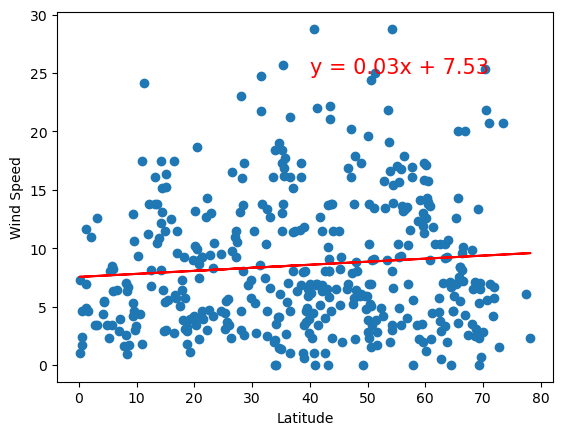

In [25]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed", (40, 25))

The r-squared is: 0.05938258929049885


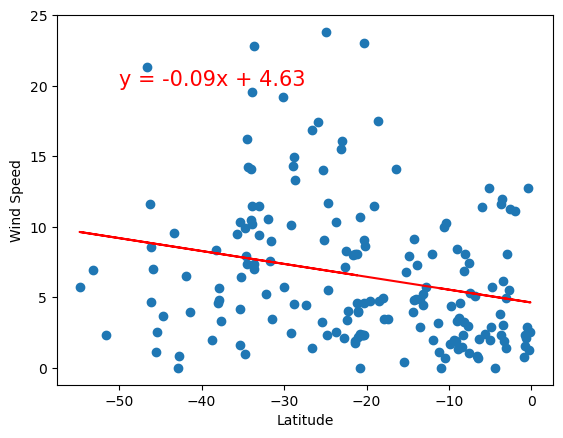

In [26]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"], "Wind Speed", (-50, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# ###
# 1. Temp vs Latitude: with a strong negative correlation in the north and strong positive correlation in the south 
#     shows that the equator is warm. Who knew!
# 2. Humidity vs Latitude: Weak positive correlation in the north means that as we move away from the equator it gets more humid
#     While weak negitive in the south means it gets less. This might be due to the random citys. Ones closer to large bodies of water will have 
#     higher humidity regaurdless of their lat.
# 3. Cloudiness vs. Latitude: The relationship between latitude and cloudiness is not strong in either hemisphere. ie not really useful to make any assumptions.
# 4.  Wind Speed vs. Latitude: There is a weak positive correlation between latitude and wind speed in the Northern Hemisphere, and a weak negative correlation in the Southern Hemisphere. 
#     the relationship is not strong enough to draw a definitive conclusion for either.